Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.0721 - loss: 116.8344 - val_accuracy: 0.1889 - val_loss: 20.1338
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2367 - loss: 65.0325 - val_accuracy: 0.3111 - val_loss: 13.5995
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2308 - loss: 55.0846 - val_accuracy: 0.5111 - val_loss: 10.8232
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2537 - loss: 47.9288 - val_accuracy: 0.5000 - val_loss: 9.9098
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2679 - loss: 42.8933 - val_accuracy: 0.4333 - val_loss: 10.2204
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3559 - loss: 26.4073 - val_accuracy: 0.5333 - val_loss: 6.9146
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3896 - loss: 24.4354 - val_accuracy: 0.6000 - val_loss: 5.2512
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3021 - loss: 24.1004 - val_accuracy: 0.6000 - val_

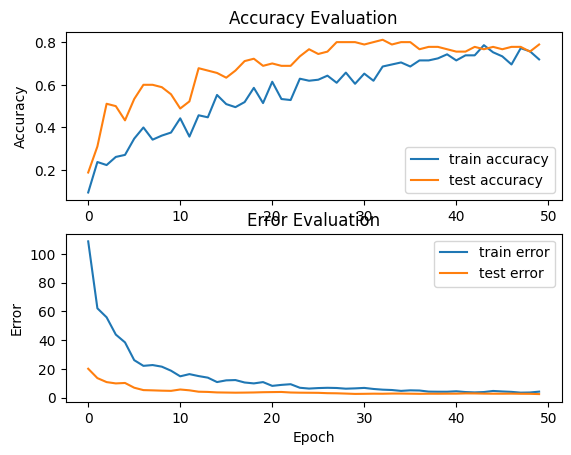

In [5]:
import json
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt


DATASET_PATH = "data.json"


def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert list into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets


def plot_history(history):
    fig, axs = plt.subplots(2)
    # creating accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")


    # creating error subplot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Evaluation")

    plt.show()
    

if __name__=="__main__":
    inputs, targets = load_data(DATASET_PATH)
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden layer
        # relu --> rectified linear unit
        
        #Better than sigmoid function
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        

        # 2nd hidden layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),


        
        # 3rd hidden layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),


        # output layer
        keras.layers.Dense(10, activation="softmax")
    ])


    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, 
                 loss = "sparse_categorical_crossentropy",
                 metrics = ["accuracy"])

    model.summary()

    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test),
             epochs=50,
             batch_size=32)
    
    # plot accuracy and error over the epochs
    plot_history(history)

# load data

# split data into train and test set

# build network architecture

# compile network

# train network

# solving the over fitting conditions

In [3]:
# solving overfitting condition
"""
Simpler Architecture --->Complex models have more capacity to memorize noise in the training data, leading to overfitting. 
Simplifying the model architecture by reducing the number of layers, nodes, or parameters can help prevent overfitting and improve generalization.

Data Augmentation ---> Data Augmentation: If acquiring more data is not feasible, data augmentation techniques can artificially increase
the size of your dataset by applying transformations such as rotation, translation, scaling, or flipping to the existing data. 
This helps expose the model to a wider variety of examples without collecting new data.

Early stopping ---> Early stopping involves monitoring the model's performance on a validation set during training and stopping the training 
process when the performance begins to degrade. This prevents the model from overfitting to the training data by halting training before
it starts to memorize noise.

Dropout ---> Dropout randomly deactivates a fraction of neurons during training, forcing the model to learn more robust features.


Regularization ---> Regularization techniques add penalties to the model's loss function to discourage overly complex models. 
Common regularization techniques include L1 regularization (Lasso), L2 regularization (Ridge), and dropout. 

"""

In [ ]:
"""

Convolutional Neural Networks(CNN's)

Why to use CNN?
-> Mainly Used for Image Processing
-> Perform Better than Multilayer Perceptron
-> Less param than dense layers

"""